In [1]:
import numpy
from matplotlib.pyplot import plot, show, grid, xlabel, ylabel

import os
import sys

# Important directories
code_dir = os.path.dirname(os.getcwd())
module_dir = os.path.dirname(os.path.dirname(os.getcwd()))

# Allows to import my own module
sys.path.insert(0, code_dir)

from LongstaffSchwarz.stochasticprocesses import BrownianMotion

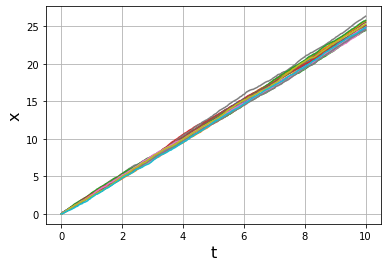

In [2]:
# The Wiener process parameter.
delta = 0.15
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 0

brownian = BrownianMotion()
brownian.simulate(x[:,0], N, dt, 0.05, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)

for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()


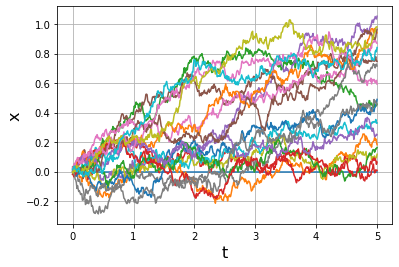

In [18]:
import numpy as np
class BrownianMotion:
    '''Brownian Motion (Wiener Process) with optional drift.'''
    def __init__(self, mu: float=0.0, sigma: float=1.0):
        self.mu = mu
        self.sigma = sigma

    def simulate(self, t: np.array, n: int, rnd: np.random.RandomState) \
            -> np.array:
        assert t.ndim == 1, 'One dimensional time vector required'
        assert t.size > 0, 'At least one time point is required'
        dt = np.concatenate((t[0:1], np.diff(t)))
        assert (dt >= 0).all(), 'Increasing time vector required'
        # transposed simulation for automatic broadcasting
        W = scipy.stats.norm.rvs(size=(n, t.size))
        W_drift = (W * np.sqrt(dt) * self.sigma + self.mu * dt).T
        return np.cumsum(W_drift, axis=-1)

bb = BrownianMotion(0.1,0.15)   
t = np.linspace(0,5,500)
r = bb.simulate(t,500,rnd=123)

for k in range(m):
    plot(t, r[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()


In [4]:
import numpy
from matplotlib.pyplot import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian.simulate(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])

# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()


TypeError: simulate() missing 1 required positional argument: 'sigma'

In [ ]:
from LongstaffSchwarz.stochasticprocesses import FractionalBrownianMotion

In [ ]:
f = FractionalBrownianMotion(n=1000, hurst=0.7, length=1)

In [ ]:
sample = numpy.ones((50,1001))
for i in range(50):
    fbm_sample = f.simulate()
    sample[i,:] = fbm_sample

In [ ]:
t = numpy.linspace(0.0, 10, 1001)

for k in range(50):
    plot(t, sample[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [ ]:
plot(fbm_sample)
title('Fractional Brownian Motion (H=0.7)')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
grid(True)
show()

In [ ]:
k = []
for i in range(5):
    for j in range(i + 1):
        k.append(i-j)

In [ ]:
k

In [ ]:
from LongstaffSchwarz.LS import LS
import numpy as np

In [ ]:
# Model parameters
# Total time.
strike = 0.95
T = 5.0
# Number of steps.
N = 50
dt = T/N
r = 0.01  # riskless rate
sigma = 0.15  # annual volatility of underlying
m = 51  # number of simulated paths

In [ ]:
# Simulate the underlying
brownian = BrownianMotion()
rnd = np.random.RandomState(1234)
x = numpy.empty((m,N+1))
x[:, 0] = r
brownian.simulate(x[:,0], N, dt,r, sigma, out=x[:,1:])
t = numpy.linspace(0.0, N*dt, N+1)

x = numpy.empty((51,N+1))
x[:, 0] = 1.0
brownian.simulate(x[:,0], N, dt, sigma, out=x[:,1:])
ls = LS(x,t,r,strike)
ls.simulate()

In [ ]:
from longstaff_schwartz.algorithm import longstaff_schwartz
from longstaff_schwartz.stochastic_process import BrownianMotion
import numpy as np

# Model parameters
t = np.linspace(0, 5, 100)  # timegrid for simulation
r = 0.01  # riskless rate
sigma = 0.15  # annual volatility of underlying
n = 50  # number of simulated paths

# Simulate the underlying
gbm = BrownianMotion(mu=r, sigma=sigma)
rnd = np.random.RandomState(1234)
x = gbm.simulate(t, n, rnd)  # x.shape == (t.size, n)

# Payoff (exercise) function
strike = 0.95

def put_payoff(spot):
        return np.maximum(strike - spot, 0.0)

# Discount factor function
def constant_rate_df(t_from, t_to):
        return np.exp(-r * (t_to - t_from))

# Approximation of continuation value
def fit_quadratic(x, y):
        return np.polynomial.Polynomial.fit(x, y, 2, rcond=None)

# Selection of paths to consider for exercise
# (and continuation value approxmation)
def itm(payoff, spot):
        return payoff > 0

# Run valuation of American put option
npv_american = longstaff_schwartz(x, t, constant_rate_df,
                                        fit_quadratic, put_payoff, itm)

# European put option for comparison
npv_european = constant_rate_df(t[0], t[-1]) * put_payoff(x[-1]).mean()

# Check results
#assert np.round(npv_american, 4) == 0.0702
#assert np.round(npv_european, 4) == 0.0598
#assert npv_american > npv_european
npv_american

In [ ]:
plot(np.linspace(0.1,1,10),l)
title('Brownian Motion (H=0.7)')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
grid(True)
show()

In [ ]:
# Payoff (exercise) function
strike = 0.95
def put_payoff(spot):
    return np.maximum(strike - spot, 0.0)

In [ ]:
# Discount factor function
def constant_rate_df(t_from, t_to):
    return np.exp(-r * (t_to - t_from))

In [ ]:
# Selection of paths to consider for exercise (and continuation value approxmation)
def itm(payoff, spot):
    return payoff > 0

In [ ]:
ls = LS(x,t,r,strike)

In [ ]:
1-ls.simulate()

In [ ]:

l = []
t = numpy.linspace(0.0, 10, 1001)

for i in np.linspace(0.1,0.9,9):
    if i == 0.5:
        continue
    f = FractionalBrownianMotion(n=1000, hurst=i, length=1)
    sample = np.ones((1000,1001))
    print(sample.shape)
    for j in range(1000):
        fbm_sample = f.simulate()
        sample[j,:] = fbm_sample
    ls = LS(sample,t,r,strike)
    l.append(np.abs(1-ls.simulate()))

In [ ]:
plot(np.linspace(0.1,0.9,8),l)
title('Fractional Brownian Motion (H=0.7)')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
grid(True)
show()

In [ ]:
f = FractionalBrownianMotion(n=1000, hurst=0.7, length=1)
sample = np.ones((100,1001))
for j in range(100):
    fbm_sample = f.simulate()
    sample[j,:] = fbm_sample
ls = LS(sample,t,r,strike)
ls.simulate()